# Content
## Recap
## **Classification Metrics**

- **Sensitivity and Specificity**

- **ROC**


- **AUC**

- **Precision Recall Curve**


#**Recap**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/222/original/Screenshot_2023-08-08_at_11.36.16_AM.png?1691475401 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/224/original/Screenshot_2023-08-08_at_11.36.24_AM.png?1691475519 width=700>

# Spam vs Non-Spam: Business Case



You are working in Google and have a task to create an Email spam detection model

Here,
- **not spam** → Class 0
- **spam** → Class 1

<br>




**Note:** For simplicity, lets call:
-  Class 0 **Not Spam** as Negative Class
- and Class 1 **Spam** as Positive Class



Lets Load the data

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 178MB/s]


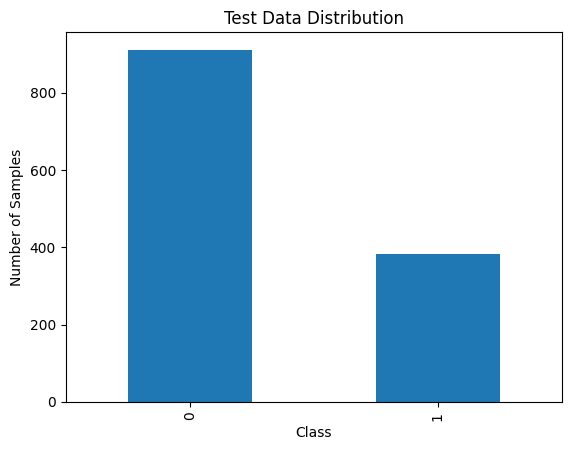

Training Data:(3878, 15),(3878,), Testing Data: (1293, 15),(1293,)


LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')





model = LogisticRegression()
model.fit(X_train,y_train)


# **Sensitivity**

Suppose we have **Fortis Hospital data** where:
- 100 patients are Cancerous (Class1)
- 900 patients are not-Cancerous (Class0)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/225/original/Screenshot_2023-08-08_at_11.36.32_AM.png?1691475554 width=700>



<br>

In medical firms, **screening test are conducted**
- in order to **identify whether a patient carries the disease or not**

<br>



#### How would we want the screening test to perform like for cancerious patients?


Ans: We would want the screening test to:
- Correctly predict as many Cancer patients (TP ⇑)
- While keeping the misclassification of Cancer patients low (FN ⇓)

<br>

**note:** This want of having **TP high** and **FN low** from a screeing test, is called **sensitivity**




**quiz**

```
What to say when screening test identifies 92 Cancer patients out of 100?

a) test has high sensitivity
b) test has low sensitivity
c) test has no sensitivity
d) cannot be determined

```
**Correct Answer**
a) test has high sensitivity

#### Why is high Sensitivity important ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/226/original/Screenshot_2023-08-08_at_11.36.38_AM.png?1691475592 width=700>



Ans: Imagine if the screening test fails to identify 95 cancer patients:

- Due to **lack of treatments**, the cancer disease will spread
- and make the **conditions for the patient more severe**

<br>

Hence **high Sensitivity** of the screening test  becomes **crucial**:
- As the **consequences of failing to treat the disease worsens the patient's condition**



#### How to calculate Sensitivity using Confusion Matrix?



Ans: For a model to have high Sensitivity,
- TP ⇑
- FN ⇓

hence sensitivity can be interpreted as:
- $Sensitivity = \frac{TP}{TP+FN}$


**observe:**

The equation to define **Sensitivity is same as Recall**

<br>

**note:** Since **Sensitivity tracks the rate of TP**, it is also called as **True Positive Rate (TPR)**




#### What will happen if a model/Screeing test is "in-sensitive"?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/227/original/Screenshot_2023-08-08_at_11.36.45_AM.png?1691475648 width=700>

Ans: It will cause  **FN to increase**:
- And as discussed worsen Cancer patient condition due to lack of treatment


<br>



#### How to measure the rate of change in FN ?



ans: It is calculated using **False Negative Rate (FNR)**:

 - $FNR  = 1 - Specificity  = 1  - \frac{TP}{TP+FN} = \frac{FN}{TP+FN}$


<br>

**note:** As these patients are missed by the model/screening test,  **FNR** is called **Miss Rate**




# **Specificity**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/228/original/Screenshot_2023-08-08_at_11.36.52_AM.png?1691475687 width=700>


#### We talked how model have high TP but what about TN and FP ?
Ans: We would want the model to:
- Correctly predict as many Non-Cancer patients (TN ⇑)
- While keeping the misclassification of Non-Cancer patients low (FP ⇓)

**note:** This want of having **TN high** and **FP low** from a screeing test, is called **specificity**

<br>




#### Why is high Specificity important ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/229/original/Screenshot_2023-08-08_at_11.37.29_AM.png?1691475739 width=700>



ans: Imagine if the screening test identifies 600  Non-cancer patients as cancerous:

- This will cause fruitless treatments on these patients which are quite expensive
- Also will create a social Stigma, anxiousness, Stress to these patients

Hence, **Specificity becomes crucial**:
- In order to avoid unnecessary expensive treatments, medications , social stigma and anxiety for the patient


<br>

**observe**

**Specificity is basically Sensitivity** defined **for Negative Class (Class0)**


#### How to calculate Specificity using Confusion Matrix ?



Ans: As to have high Specificity:
- TN ⇑
- FP ⇓

Hence we can define Specificity as:

$Specificity = \frac{TN}{TN + FP}$

**Note:** As Sensitivity measures the rate of TP ,
- Specificity measures the rate of TN, hence also called as **True Negative Rate (TNR)**





#### What will happen if a model/Screeing test is "not-specific"?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/230/original/Screenshot_2023-08-08_at_11.37.41_AM.png?1691475799 width=700>



Ans: It will cause  **FP to increase**:
- And as discussed, resulting in more Non-Cancer patients(class0) to undego
 - irrelevant expensive treatments, anxiety and social stigma


<br>


#### How to measure the rate of change in FP ?




ans: AS **FNR** is used to measure change in FN , rate of change in FP  is calculated using **False Positive Rate (FPR)**:

 - $FPR  = 1 - Specificity  = 1  - \frac{FP}{TN+FP} = \frac{FP}{TN+FP}$








**quiz**

```
In a credit fraud detection system, which is more important?
a) Sensitivity
b) Specificity
c) both
```
**correct Answer**
c) both


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/106/original/Screenshot_2023-08-24_at_10.22.37_AM.png?1692852989 width=700>

# **ROC (Reciever Operating Characterstic Curve)**

#### Recall our model got a 88% F1score, what can be done to increase performance ?

Ans: Doing some hyperparameter tuning might help:
- Adding regularization

#### What if, adding regularization does not do major improvement in model, what can be the issue ?
Ans: Recall our Cancer patient example, where:
- We wanted to correctly classify cancer patients
- And for this, we used a threshold ($\tau$) of 0.4 instead of 0.5

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/231/original/Screenshot_2023-08-08_at_11.37.49_AM.png?1691475864 width=700>

#### How to ensure we select the correct threshold ?


Ans: For this, we will be doing 3 steps.




**Step1:** Remember, Logistic Regression **outputs probabilities [$ p = P(y=1|x)$ or $p =  P(y=0|x)$] before thresholding**




<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/232/original/Screenshot_2023-08-08_at_11.37.57_AM.png?1691475926 width=700>

-  Find the probablities for $p = P(y=1|x)$  and **sort  probabilities in descending order**

**Step2:** Set each probabilities as threshold ($\tau$) and find $\hat{y}$:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/234/original/Screenshot_2023-08-08_at_11.38.06_AM.png?1691475976 width=700>


- After creating $\hat{y}$: find **TPR and FPR**
  - $TPR = \frac{TP}{TP+FN}$

  - $FPR = \frac{FP}{TN+FP}$


**Note:** $\hat{y} = 1 $ if $p \geq \tau$ , else $\hat{y} = 0$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/235/original/Screenshot_2023-08-08_at_11.38.16_AM.png?1691476007 width=700>






<br>

**Step3:** After Step2, we will have **pairs of TPR and FPR values for each probabilities**:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/237/original/Screenshot_2023-08-08_at_11.38.23_AM.png?1691476087 width=700>

- Now, we plot TPR (Y-axis) vs FPR (X-axis) for each threshold
- We **select the one threshold based on our problem**

<br>


**Note:** Since in our Spam classifier problem, we want FPR $\approx 0$
- We **pick that threshold** which has **high TPR and low FPR**

<br>


**observe**

The **plot TPR (Y-axis) vs FPR (X-axis)** for each threshold will **look like a curve**. This is called as **ROC (Reciever Operating Characteristic) curve**

- ROC term comes from electronics and radio engineering
- usually used in signal procressing







**Quiz**

```
What will be time complexity, when using merge sort to sort the probabilities ?

a) o(n^2)
b) o(n)
c) o(nlog n)
d) o(log n)



```
**correct Answer**
c) o(nlog n)

# **understanding steps for ROC**

Suppose we have 6 sample data, such that:

- X =[$x^{(1)},x^{(2)},x^{(3)},x^{(4)},x^{(5)}, x^{(6)}$]
- Y = [1, 1, 0, 1, 0 , 0]
- p = [0.65, 0.94, 0.3, 0.92, 0.7 , 0.2]



**Observe**

data is balanced
- Equal number of class 1 and class 0 samples

<br>

**Step1**

We sort the entire data based on values of $p$ in decreasing order:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/238/original/Screenshot_2023-08-08_at_11.38.33_AM.png?1691476121 width=700>


- p = [0.94, 0.92, 0.7, 0.65, 0.3, 0.2]
- X = [$x^{(2)},x^{(4)},x^{(5)},x^{(1)},x^{(3)}, x^{(6)}$]
- Y = [1, 1, 0, 1, 0, 0]



**Step2**

Taking each probabilites as threshold and finding $\hat{y}$

- Showing when:  $\tau^{1}  = p^{1} =  0.94$,


| X | Y | P | $\hat{y}$ |
| :-- | :--| :--| :--|
|$x^{2}$| 1  | 0.94| 1 |
|$x^{4}$| 1  | 0.92| 0 |
|$x^{5}$| 0  | 0.70| 0 |
|$x^{1}$| 1  | 0.65| 0 |
|$x^{3}$| 0  | 0.30| 0 |
|$x^{6}$| 0  | 0.20| 0 |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/239/original/Screenshot_2023-08-08_at_11.39.11_AM.png?1691476159 width=700>


<br>

We now calculate TPR and FPR:
#### As TP = 1 , FP = 0 , FN  = 2 , TN = 3, what will be TPR and FPR value ?
Ans: TPR and FPR value are:

- $TPR^{(1)} = \frac{TP}{TP + FN} = \frac{1}{1 + 2} = 0.33 $

- $FPR^{(1)} = \frac{FP}{FP + TN} = \frac{0}{0 + 3} = 0 $








We repeat **Step2** for every other probabilities


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/240/original/Screenshot_2023-08-08_at_11.39.20_AM.png?1691476199 width=700>

- This will give us pair of **TPR and FPR** for each of the 6 probabilities


| P | TPR | FPR |
| :--| :--| :--|
| 0.94| 0.33 | 0.00 |
| 0.92| 0.50 | 0.00 |
| 0.70| 0.67 | 0.33 |
| 0.65| 1.00 | 0.33 |
| 0.30| 1.00 | 0.67 |
| 0.20| 1.00 | 1.00 |


**Step3**, after finding all the pair TPR and FPR for each probabilites, We **plot each of TPR and FPR values**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/241/original/Screenshot_2023-08-08_at_11.39.28_AM.png?1691476231 width=700>


#### What will be the ideal threshold to pick ?

Ans: In Spam classifier, we want minimum FP value while maximizing TP:
- The best tradeoff is achieved when $P = 0.65$

<br>

**Observe**

The ROC curve is very irregular in shape






**Quiz**

```
How many points are typically used to plot an ROC curve?
a) 2 points (0,0) and (1,1)
b) 3 points representing the thresholds 0.25, 0.5, and 0.75
c) 10 points equally spaced between 0 and 1
d) Depends on the number of unique threshold values

```
**correct answer**
d) Depends on the number of unique threshold values

#### Lets consider a Random Model, what will be TPR and FPR ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/242/original/Screenshot_2023-08-08_at_11.39.36_AM.png?1691476266 width=700>

Ans: the $\hat{y}$  for Random model, will be same as jumbling $y$
- As the example data was balanced:
 - TP+FN = FP + TN = $\frac{6}{2}  = 3 $

- And if **there are k TP points, due to randomness**
  - There will be **k FP points as well**
  - Showing TPR = FPR

<br>

Hence on plotting TPR vs FPR for Random model,
- It becomes a line with equation: $(y=x)$



```
Which of the following statements is true regarding the ROC curve?
a) The closer the curve is to the diagonal line, the better the model's performance.
b) The further the curve is from the diagonal line, the better the model's performance.
c) The ROC curve is only applicable to binary classification problems.
d) We get ROC by plotting TPR and FPR
```
**Correct Answer**
b) The further the curve is from the diagonal line, the better the model's performance.

# **AU-ROC (Area Under ROC Curve)/ AUC**

Imagine we have two models: Model A , Model B and their plot look like:

#### According to the plot which model is better Model A or Model B ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/243/original/Screenshot_2023-08-08_at_11.40.10_AM.png?1691476298 width=700>



Ans: Since TPR value of Model B is greater than Model A at the same FPR value

- Hence Model B better than Model A



We see intitutively, Model B better than Model A, but

<br>

#### How to mathematically show Model B better than Model A ?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/246/original/Screenshot_2023-08-08_at_12.05.07_PM.png?1691476520 height=600 width=700>

Ans: Lets consider area under the ROC curve (AU-ROC/ AUC):

- Then AUC of Model B > AUC of Model A,

Hence Model B is better than Model A

**quiz**

(What do you think)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/245/original/Screenshot_2023-08-08_at_12.03.07_PM.png?1691476401 height=400 width=400>



```
What will be the AUC for a random model ?

a) 0
b) 0.5
c) 1
d) 0.25

```
**Correct Answer**
b) 0.5

#### What will be the value of TPR and FPR for an ideal model for each threshold ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/247/original/Screenshot_2023-08-08_at_11.40.28_AM.png?1691476592 width=700>



Ans: When threshold is close to 1 ( most of the $\hat{y} = 0$)
- The $TPR \approx 1$ and FPR $\approx 0$

When threshold is close to 0, (most of the $\hat{y} = 1$ )
- Then both $TPR, FPR \approx 1$


<br>


#### What will be the AU-ROC for an ideal model ?
Ans: The curve for Ideal model will be
1. Line starting from $(0,0)$ to $(0,1)$
2. and another line starting from $(0,1)$ to $(1,1)$

Hence the **AU-ROC will be the area of the whole square = $1 \times 1 = 1$**

<br>





#### What will be the AU-ROC for a Bad model ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/248/original/Screenshot_2023-08-08_at_11.40.36_AM.png?1691476624 width=700>




Ans: Clearly we can say, the curve for the Bad model will have
1. Line starting from $(0,0)$ to $(1,0)$
2. and another line starting from $(1,0)$ to $(1,1)$

Hence AU-ROC $ = 0 $

#### What does AU-ROC $= 0$ really mean ?

ans: It means that
- **the bad model probabilities ($p$) misclassifies every $y$ of the data.**


#### Would doing $(1-p)$ on every model probability fix the Bad model ?





Ans: **Yes**, as now the model AUC becomes:
- $AUC_{new} = 1 - AUC_{old} = 1 - 0  = 1 $

<br>

**Note:** Therefore, **any bad model** which has a curve below the random model $= 0.5$ , **can be fixed**
- By doing a simple hack of reversing the probabilities


#### How is AU-ROC curve  different from Precision, Recall or F1-score?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/249/original/Screenshot_2023-08-08_at_11.40.47_AM.png?1691476803 width=700>

Ans: In Precision, Recall or F1 score:

- We used a certrain threshold on  which we found $\hat{y^{(i)}}$


While in AU-ROC curve:
- we find **AUC metric on every possible threshold**


**quiz**

```
Which of the following metrics can be directly derived from the ROC curve?
a) Accuracy
b) Precision
c) Recall
d) Area Under the Curve (AUC)
```
**Correct Answer:** d) Area Under the Curve (AUC)

Suppose we have a label $y = [1,1,0,1,1]$ and there are 2 models, such that:

1. $P_{M1} $: $[0.95, 0.92, 0.80, 0.76, 0.71]$

2. $P_{M2} $: $[0.2, 0.1, 0.08, 0.06, 0.02]$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/250/original/Screenshot_2023-08-08_at_11.40.56_AM.png?1691476842 width=700>


#### What will be $\hat{y^{(i)}}$ for M1 when threshold = $0.95$ ?

Ans: $\hat{y^{(i)}}_{M1} = [1, 0 , 0 , 0, 0 ]$



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/251/original/Screenshot_2023-08-08_at_11.41.06_AM.png?1691476888 width=700>


#### What will be $\hat{y^{(i)}}$ for M2 when threshold = $0.2$ ?

Ans: $\hat{y^{(i)}}_{M2} = [1, 0 , 0 , 0, 0 ]$

<br>

Similarly, when threshold = $0.92$, for M1:
- $\hat{y^{(i)}}_{M1} = [1, 1 , 0 , 0, 0 ]$

And threshold = $0.1$, for M2:
- $\hat{y^{(i)}}_{M2} = [1, 1 , 0 , 0, 0 ]$


**observe**

As the **ordering of the threshold of 2 models are same**:
- Hence $[[TPR^{(1)}_{M1}, FPR^{(1)}_{M1}],...,[TPR^{(n)}_{M1}, FPR^{(n)}_{M1}] ] =  [[TPR^{(1)}_{M2}, FPR^{(1)}_{M2}],...,[TPR^{(n)}_{M2}, FPR^{(n)}_{M2}] ] $

- Meaning the $AUC_{M1} = AUC_{M2}$






**quiz**

```
What does it mean when two ROC curves overlap?
a) The two models have same thresholds
b) The two models have similar performance.
c) The two models have opposite performance.
d) The two models have different performance metrics.
```
**correct Answer**
b) The two models have similar performance.


# **AU-ROC curve Code**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


stores model probabilities

In [ ]:
probability = model.predict_proba(X_test)

In [ ]:
probability

array([[0.98279758, 0.01720242],
       [0.34068989, 0.65931011],
       [0.42691517, 0.57308483],
       ...,
       [0.97405156, 0.02594844],
       [0.17995704, 0.82004296],
       [0.9977192 , 0.0022808 ]])

**Observe**

```Probability``` variable contains 2 probability $P(Y=1 |X)$ and $P(Y=0 |X )$

#### But for thresholding we need only one probability, what can be done ?

Ans: lets consider only $ p = P(Y=1 |X) $




In [ ]:
probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

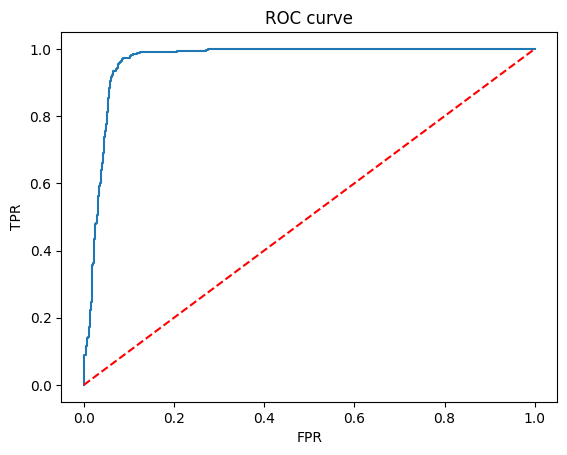

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.9659462326950391

## **issue with AU-ROC**

**observe**

We get an AU-ROC value of 97.8%
- showing that the model is performing very good

But recall our F1 Score was just 88%
- which made us believe our model was a decent one

<br>

#### Why a huge difference in model performance when using AU-ROC and F1 score ?
ans: Recall our data is imbalance:(70% $\rightarrow$ class 0 and 30% $\rightarrow$ class1):

- ROC curves provide an aggregate measure of model performance across all possible classification thresholds.

- Hence it can make a **poor model on the minority class appear better**
 - by focusing more on the performance on the majority class.

<br>

**Note:** When data is highly imbalanced,
- AU-ROC is not prefered

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/107/original/Screenshot_2023-08-24_at_10.24.54_AM.png?1692853066 width=700>

```
If data contains 50 spam and 300 non-spam samples, then which is true?
a) ROC may overestimate the model's performance.
b) ROC may underestimate the model's performance.
c) ROC does provide useful information.
d) ROC cannot be created
```
**Correct Answer**

a) ROC may overestimate the model's performance.

# **Precision - Recall curve**

#### What can be used instead of AU-ROC curve, when data is imbalanced ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/252/original/Screenshot_2023-08-08_at_11.41.18_AM.png?1691476974 width=700>



Ans: Since F1 score works well for imbalance data:
- We take **Precision and Recall values for every probability** instead of TPR and FPR

<br>

Rest of the approach remains same as AU-ROC

**Note:** Finding area under the curve of Precision and recall is called **AU-PRC**

**Quiz**

```
Which evaluation metric can be directly derived from the AUC-PRC?
a) Accuracy
b) F1 score
c) Precision
d) Recall
```

**Correct Answer** b) F1 score

**Explanation**
As we have precision and recall for each threshold:
- We can find F1-Score for the same

# **Precision Recall curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

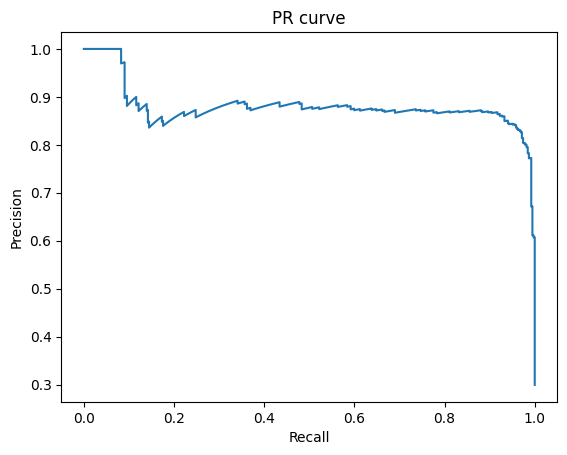

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8795786409385219

**observe**

Now the **AU-PRC** comes close to F1 score
- Showing that **PRC** worked just fine in imbalanced data




Some extra information for classification Metrics in PostRead:

- [Lift and Chart, Cheatsheet for Metrics, metric vs loss](https://colab.research.google.com/drive/1WadYQgslAmgSqSu9ZMcGoWSNp7HkEGln?usp=drive_link)
